# Training Dataset 

The training dataset is in dataset_train.csv file. 

## Preview
Reading the csv file and looking at dataset.

In [ ]:
%pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

dataset_train = f'../datasets/dataset_train.csv'
df = pd.read_csv(dataset_train)
df.head()

the `Hogwarts house` is the real outcome. We need to train our model with selected features and so that the predicted output `house` could later be compared to the real one. 
We need to inspect the features:
- non numeric or biographic features (first and last names, birthday dates and best hand) might be enriching our model accuracy but are harder to sort out. we will inspect them in a second round of training
- numeric values for columns Arithmancy to Flying, which represent 13 features is a good start

First,we are focusing on features with numeric values.
Selecting numeric columns, where dtypes are np.number
There is total of 13 features that has numeric types, index is not counted.
Standardization and handling missing data (NaN) will be required.

In [ ]:
df.select_dtypes(include=np.number).head(10)

To describe statitics to dataset, we could have used pandas module describe() function
```python
df[df.columns[1:]].describe()
```
However, `pd.describe()` is a forbidden function and using it would be considered as cheating.

We will use our own `describe.py` Python program launched from `jupyter notebook`.
For that purpose, we can import the `os module`, to interact with the operating system
and execute it, of course in our `virtual environment`

In [ ]:
import os

script_path = '../dslr/describe.py'
dataset_train = f'../datasets/dataset_train.csv'
os.system(f'../venv/bin/python {script_path} {dataset_train}')


Missing values for numeric columns features 

In [ ]:
df[df.select_dtypes(include=np.number).columns[1:]].isna().sum()

In [ ]:
df[df.select_dtypes(include=np.number).columns[1:]].notna().sum()

### Plots

Exploring these 13 features.

    Only the meaningful variables should be included.
    The independent variables should be independent of each other. 
    That is, the model should have little or no multicollinearity.

In [103]:
df[df.select_dtypes(include=np.number).columns[1:]].columns.to_list()

['Arithmancy',
 'Astronomy',
 'Herbology',
 'Defense Against the Dark Arts',
 'Divination',
 'Muggle Studies',
 'Ancient Runes',
 'History of Magic',
 'Transfiguration',
 'Potions',
 'Care of Magical Creatures',
 'Charms',
 'Flying']

Plots can be of 3 kinds :
- `distibution`, such as histograms
- `categorical`, such as boxplots
- `relational` such as scatter plot

Using inline matplotlib module. (Affichage avec la bibliothèque graphique intégrée à Notebook)



#### Histogram
Distribution of a given features among Hogwarts houses.
It looks like 2 houses (Griffindor and Slytherin) are not good at `Herbology`.
`Herbology` features might be a good feature for our model beacuse it might allow a better classification.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

df_herb = df.groupby('Hogwarts House')['Herbology']
df_herb.plot(kind='hist', alpha=0.4, legend=True)
plt.show()

#### boxplot

A boxplot is a graphical and standardised way to display the distribution of data based on five key numbers:

    “minimum”
    1st Quartile (25th percentile)
    median (2nd Quartile/ 50th Percentile)
    3rd Quartile (75th percentile)
    “maximum”

In [ ]:
import seaborn as sns

sns.boxplot(x='Hogwarts House', y='Astronomy', data=df)

#### scatter plot

In [ ]:
plt.scatter('Astronomy', 'Herbology', marker='.', alpha=0.3, data=df)
plt.show()

In [ ]:
sns.scatterplot(
 data=df, 
 x="Astronomy",
 y="Herbology",
 hue="Hogwarts House",
)

In [ ]:
sns.scatterplot(
 data=df, 
 x="Astronomy",
 y="Defense Against the Dark Arts",
 hue="Hogwarts House",
 legend='auto'
)

#### Pair Plot Matrix

In [ ]:
target="Hogwarts House"
remove_list = ['Index', 'First Name', 'Last Name', 'Birthday', 'Best Hand']

df_num = df.drop(remove_list, axis=1)
features = df_num.keys()[1:].to_list()
sns.pairplot(df_num,
                x_vars=features,
                y_vars=features,
                hue=target,
                corner=True
            )

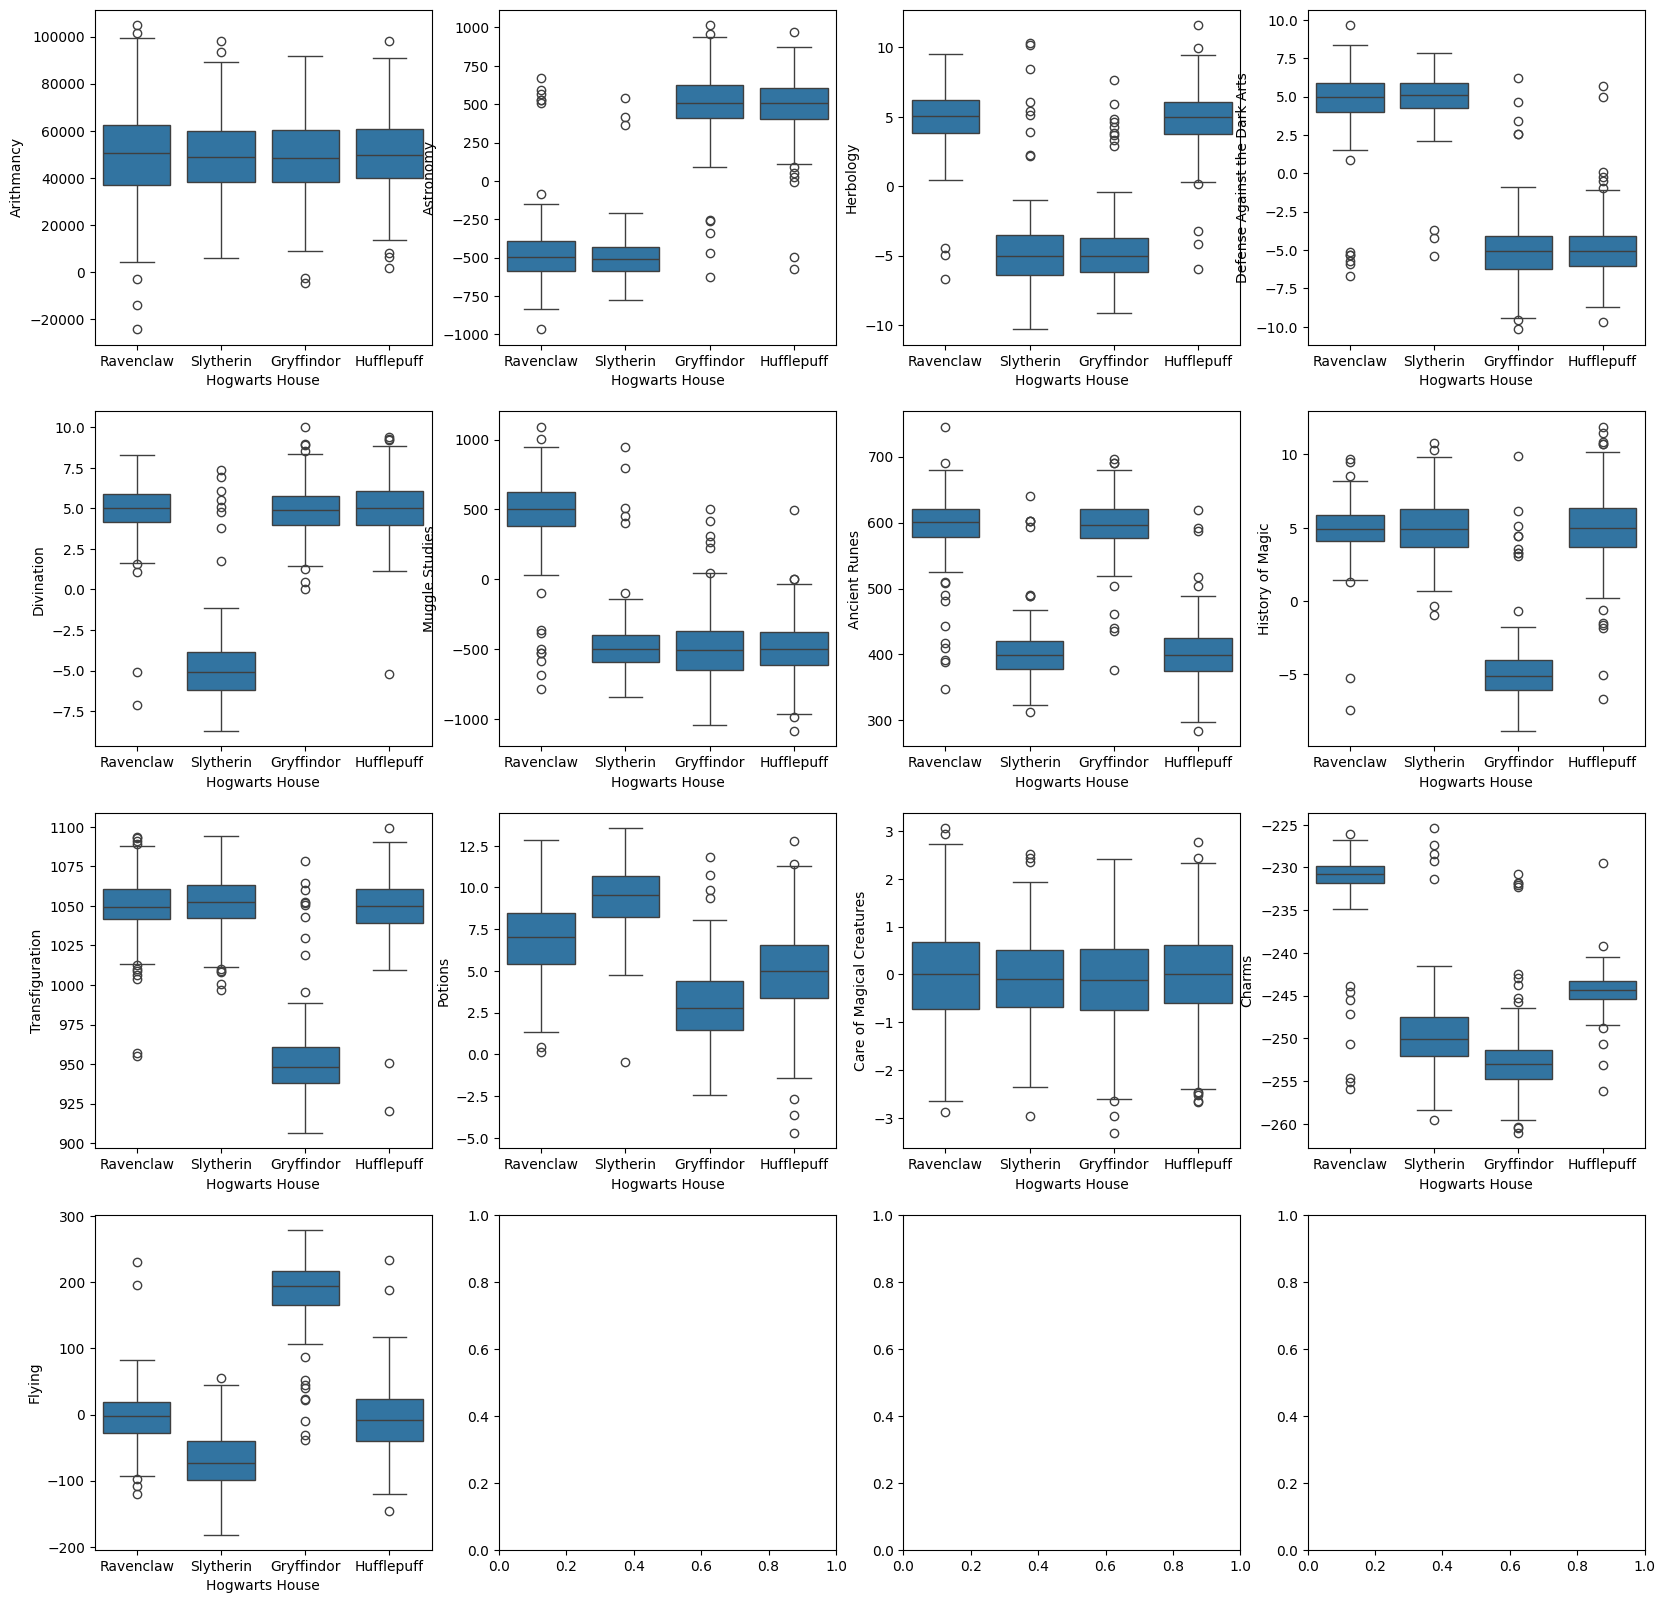

In [105]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
features = df[df.select_dtypes(include=np.number).columns[1:]].columns.to_list()
for idx in range(13):
    i = idx // 4
    j = idx % 4
    sns.boxplot(data=df, x="Hogwarts House", ax=axs[i, j], y=features[idx])
plt.show()

Really bad features['Arithmancy', 'Care of Magical Creatures'] cannot classify well

"Defense Against the Dark Arts" is anti-correlated with  "Astronomy".



In [117]:
best_hand = df.groupby('Hogwarts House')['Astronomy']

best_hand.describe()

,count,mean,std,min,25%,50%,75%,max
Hogwarts House,,,,,,,,
Gryffindor,323.0,493.336646,195.613259,-622.924308,407.222386,504.370715,624.239863,1016.211940
Hufflepuff,517.0,497.708002,164.625787,-571.093649,404.819562,505.681327,604.667513,970.617679
Ravenclaw,434.0,-480.043083,184.226621,-966.740546,-584.805809,-494.322762,-392.117141,669.262135
Slytherin,294.0,-496.333927,149.715455,-777.589078,-587.586177,-507.867390,-433.200244,540.609246
